# Summary
These are the input values to each neuron during an update step. Taking the sign of $h_i(t)$ gives us the next value of that neuron, $S_i(t+1) = \text{sgn}(h_i(t))$.

## Hopfield Network

#### Weight Matrix:
$$ w_{ij} = \sum_{\mu=1}^P \xi_i^\mu \xi_j^\mu $$

#### Update Rule:
\begin{align*}
    h_i(t) = \sum_{j=1}^N w_{ij}S_j(t) = \sum_{\mu=1}^P \xi_i^\mu \left( \sum_{j = 1}^N \xi_j^\mu S_j(t) \right) = \sum_{\mu=1}^P \xi_i^\mu m^\mu(t)
\end{align*} 

\begin{align*}
    h_i(t) = \sum_{\mu=1}^P \xi_i^\mu \left( \sum_{j = 1}^N \xi_j^\mu S_j(t) \right)
\end{align*} 

\begin{align*}
    h_i(t) = \sum_{\mu=1}^P \xi_i^\mu \left( \sum_{j = 1}^N \xi_j^\mu S_j(t) \right)^{d-1}
\end{align*} 


#### Interaction Functions:
Note, that we omit the normalization factors $\frac{1}{N}$ since we only care about sign and omit the self-coupling terms by setting $w_{ii} = \sum_{\mu=1}^P \xi_i^\mu \xi_i^\mu = 0$ .

\begin{align*}
    q^\mu(t) &= \sum_{j \neq i}^N \xi_j^\mu S_j(t)
\end{align*} 

## Polynomial Interaction Function ([Krotov, Hopfield](https://arxiv.org/pdf/1606.01164.pdf))
#### Update Rule:
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \left( \xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^d - \left( -\xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^d \right] \\
    &= \sum_{\mu=1}^P \left[ \left( \sum_{m=0}^n {n \choose m} (\xi_i^\mu)^m (\sum_{j \neq i} \xi_j^\mu S_j(t))^{n-m} \right) - \left( \sum_{m=0}^n {n \choose m} (- \xi_i^\mu)^m (\sum_{j \neq i} \xi_j^\mu S_j(t))^{n-m} \right) \right] \\
    &= \sum_{\mu=1}^P \left[ \left( 1 - (-1)^m \right) \left( \sum_{m=0}^n {n \choose m} (\xi_i^\mu)^m (\sum_{j \neq i} \xi_j^\mu S_j(t))^{n-m} \right) \right] \\
    &= 2 \sum_{\mu=1}^P \xi_i^\mu \left[\sum_{m \ \textrm{odd}} {d \choose m} \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^{d-m} \right] \\
    &= 2 \sum_{\mu=1}^P \xi_i^\mu \left[\sum_{m \ \textrm{odd}} {n \choose m} \left( q^\mu(t) \right)^{n-m} \right] 
\end{align*} 

#### Examples:
\begin{align*}
    n=3 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[3 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^2 + 1 \right] \\
    n=4 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[4 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^3 + 4 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right) \right] \\
    n=5 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[5 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^4 + 10 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^2 + 1 \right] \\
    n=6 &\implies h_i(t) = 2 \sum_{\mu=1}^P \xi_i^\mu \left[6 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^5 + 20 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right)^3 + 6 \left( \sum_{j \neq i} \xi_j^\mu S_j(t) \right) \right]    
\end{align*} 

## Exponential Interaction Function ([Demircigil et al.](https://arxiv.org/pdf/1702.01929.pdf))
#### Update Rule:
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \exp \left( \xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right) - \exp \left( -\xi_i^\mu + \sum_{j \neq i} \xi_j^\mu S_j(t) \right) \right]
\end{align*}


## Asymmetric Hopfield Network ([Sompolinksy, Kanter](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.57.2861))
#### Update Rule:
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[\xi_i^\mu \left( \sum_{j = 1}^N \xi_j^\mu S_j(t) \right) + \lambda \xi_i^{\mu+1} \left( \sum_{j = 1}^N \xi_j^\mu \bar{S_j}(t) \right) \right] \\
    h_i(t) &= \sum_{\mu=1}^P \left[\xi_i^\mu q^\mu(t) + \lambda \xi_i^{\mu+1} \bar{q}^\mu(t) \right]
\end{align*} 

#### Discrete Convolution:
\begin{align*}
    \bar{S}_j(t) &= \sum_{k=0}^t G(t-k)S_j(k) \quad , \quad G(t) = \frac{\Theta(\tau - t)}{t}
\end{align*}

Note that G(t) sums to 1.

## Asymmetric Dense Associative Memory Network (Proposed Rules)
#### Rule 1
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \xi_i^\mu \left(\sum_{j = 1}^N \xi_j^\mu S_j(t) \right)^{d-1} + \lambda \xi_i^{\mu+1} \left(\sum_{j = 1}^N \xi_j^\mu \bar{S_j}(t) \right)^{d-1} \right]
\end{align*} 

\begin{align*}
    n=3 &\implies h_i(t) = \sum_{\mu=1}^P \left[ \xi_i^\mu \left(\sum_{j,k} \xi_j^\mu \xi_k^\mu S_j(t) S_k(t) \right) + \lambda \xi_i^{\mu+1} \left(\sum_{j,k} \xi_j^\mu \xi_k^\mu \bar{S_j}(t) \bar{S_k}(t) \right) \right] \\
    n=4 &\implies h_i(t) = \sum_{\mu=1}^P \left[ \xi_i^\mu \left(\sum_{j,k,l} \xi_j^\mu \xi_k^\mu \xi_l^\mu S_j(t) S_k(t) S_l(t) \right) + \lambda \xi_i^{\mu+1} \left(\sum_{j,k,l} \xi_j^\mu \xi_k^\mu \xi_l^\mu \bar{S_j}(t) \bar{S_k}(t) \bar{S_l}(t) \right) \right]
\end{align*} 


#### Proposed Rule 2
This comes from adding the term to the energy function and has multiple powers for the interaction term. 
\begin{align*}
    h_i(t) &= \sum_{\mu=1}^P \left[ \left( \xi_i^\mu + q^\mu(t) \right)^n + \lambda \xi^{\mu+1}_i \left( \frac{\xi^\mu_i}{\tau} + \xi^\mu_i \bar{S}_i(t-1) + \bar{q}^\mu(t) \right)^n - \left( - \xi_i^\mu + q^\mu(t) \right)^n - \lambda \xi^{\mu+1}_i \left( -\frac{\xi^\mu_i}{\tau} + \xi^\mu_i \bar{S}_i(t-1) + \bar{q}^\mu(t) \right)^n \right] \\
    &= 2 \sum_{\mu=1}^P \xi_i^\mu \left[\sum_{m \textrm{ odd}} {n \choose m} \left[ \left( q^\mu(t) \right)^{n-m} + \left(\frac{\lambda \xi^{\mu+1}_i}{\tau^m}\right) \left( \xi^\mu_i \bar{S}_i(t-1) + \bar{q}^\mu(t) \right)^{n-m} \right] \right] 
\end{align*} 

In [401]:
# Import Packages
import numpy as np
np.random.seed(1)

from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
import scipy
from scipy import signal

import multiprocessing as mp
pool_obj = mp.Pool()

Process ForkPoolWorker-80:
Process ForkPoolWorker-81:
Process ForkPoolWorker-83:
Process ForkPoolWorker-85:
Process ForkPoolWorker-78:
Process ForkPoolWorker-79:
Process ForkPoolWorker-82:
Traceback (most recent call last):
Process ForkPoolWorker-84:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/zaza/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/zaza/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/zaza/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/zaza/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/zaza/anaconda3/lib/python3.8/multiprocessing/process.py",

In [2]:
# Data Preprocessing
def generate_patterns(num_neuron = 16, num_pattern = 2):
    patterns = np.random.binomial(1, 0.5, (num_pattern, num_neuron))
    np.place(patterns, patterns == 0, -1)
    return patterns

def corrupt_pattern(pattern, corruption_level):
    corrupted_pattern = np.copy(pattern)
    inv = np.random.binomial(n=1, p=corruption_level, size=len(pattern))
    for i, v in enumerate(pattern):
        if inv[i]:
            corrupted_pattern[i] = -1 * v
    return corrupted_pattern

def flip_bit(pattern):
    idx = np.random.randint(0, len(pattern)) 
    flipped_pattern = np.copy(pattern)
    flipped_pattern[idx] = -pattern[idx]
    return flipped_pattern 

def plot(data, test, predicted, figsize=(8, 12)):
    fig, axarr = plt.subplots(1,3, figsize=figsize)

    axarr[0].set_title('Original vs Original')
    axarr[0].imshow(data @ data.T, cmap=cm.gray_r)    
    axarr[1].set_title("Original vs Corrupted")
    axarr[1].imshow(data @ test.T, cmap=cm.gray_r)
    axarr[2].set_title("Original vs Reconstructed")
    axarr[2].imshow(data @ predicted.T, cmap=cm.gray_r)
    plt.savefig("result.png")
    plt.show()    

In [66]:
# # Standard Hopfield Network
# class HopfieldNetwork(object):      
#     def initialize(self, train_data):
# #         print("Start to train weights...")
#         self.num_pattern =  train_data.shape[0]
#         self.num_neuron = train_data.shape[1]
        
#         # initialize weights
#         W = np.zeros((self.num_neuron, self.num_neuron))
        
#         # Hebb rule
#         for i in tqdm(range(self.num_pattern)):
#             t = train_data[i]
#             W += np.outer(t, t)
        
# #        Make diagonal element of W into 0
#         diagW = np.diag(np.diag(W))
#         W = W - diagW
#         W /= self.num_pattern
        
#         self.W = W 
    
#     def predict(self, data, num_iter=1):
#         self.num_iter = num_iter
        
#         # Copy to avoid call by reference 
#         copied_data = np.copy(data)
        
#         # Define predict list
#         predicted = []
#         for i in tqdm(range(len(data))):
#             predicted.append(self._run(copied_data[i]))
#         return np.array(predicted)
    
#     def _run(self, init_s):
#         """
#         Asynchronous update
#         """
#         # Compute initial state energy
#         s = init_s

#         # Iteration
#         for idx in range(self.num_iter):
#             for i in range(self.num_neuron):
#                 # Update s
#                 s[i] = np.sign(self.W[i].T @ s)
#         return s


# # Modified Hopfield Memory Network
# class PolynomialHopfieldNetwork(object):      
#     def initialize(self, patterns, d = 3):
#         self.patterns = patterns
#         self.d = d
#         self.num_pattern =  patterns.shape[0]
#         self.num_neuron = patterns.shape[1]
            
#     def predict(self, data, num_iter=1):
#         self.num_iter = num_iter
        
#         # Copy to avoid call by reference 
#         copied_data = np.copy(data)
        
#         # Define predict list
#         predicted = []
#         for i in tqdm(range(len(data))):
#             predicted.append(self._run(copied_data[i]))
#         return np.array(predicted)
    
#     def _run(self, init_s):
#         """
#         Asynchronous update
#         """
#         # Compute initial state energy
#         s = init_s

#         # Iteration
#         for idx in range(self.num_iter):
#             for i in range(self.num_neuron):
#                 h_i = 0
#                 for p in range(self.num_pattern):
#                     # Calculate input for for each pattern and sum over each.
#                     h_i += self.patterns[p,i] * (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i])**(self.d-1)
#                 s[i] = np.sign(h_i)
#         return s
    
# # Dense Associative Memory Network
# class DenseNetwork(object):      
#     def initialize(self, patterns, d = 3):
#         print("Start to train weights...")
#         self.patterns = patterns
#         self.d = d
#         self.num_pattern =  patterns.shape[0]
#         self.num_neuron = patterns.shape[1]
    
#     def predict(self, data, num_iter=1):
#         self.num_iter = num_iter
        
#         # Copy to avoid call by reference 
#         copied_data = np.copy(data)
        
#         # Define predict list
#         predicted = []
#         for i in tqdm(range(len(data))):
#             predicted.append(self._run(copied_data[i]))
#         return np.array(predicted)
    
#     def _run(self, init_s):
#         """
#         Asynchronous update
#         """
#         # Compute initial state energy
#         s = init_s

#         # Iteration
#         for idx in range(self.num_iter):
#             for i in range(self.num_neuron):
#                 h_i = 0
#                 for p in range(self.num_pattern):
#                     # Update s
#                     h_on = (self.patterns[p,i] + (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i]))**self.d
#                     h_off = (-self.patterns[p,i] + (np.dot(self.patterns[p],s) - self.patterns[p,i]*s[i]))**self.d
#                     h_i += (h_on - h_off)
#                 s[i] = np.sign(h_i)
#         return s

In [5]:
# # Generate Patterns
# patterns = generate_patterns(num_neuron = 1000, num_pattern = 20)
# degree = 12

# # Generate Corrupted Patterns
# flipped_patterns = np.array([flip_bit(p) for p in patterns])
# corrupted_patterns = np.array([corrupt_pattern(p, 0.2) for p in patterns])

# # Create Hopfield Network Model
# hopfield_model = HopfieldNetwork()
# hopfield_model.initialize(patterns)
# modified_hopfield_model = ModifiedHopfieldNetwork()
# modified_hopfield_model.initialize(patterns, d=degree)
# damn_model = Dense_Network()
# damn_model.initialize(patterns, d=degree)

# # Try to Reconstruct Original Patterns
# h_reconstructed_patterns = np.array(hopfield_model.predict(corrupted_patterns))
# mh_reconstructed_patterns = np.array(modified_hopfield_model.predict(corrupted_patterns))
# damn_reconstructed_patterns = np.array(damn_model.predict(corrupted_patterns))

# # Plot Values
# print("Hopfield")
# plot(patterns, corrupted_patterns, h_reconstructed_patterns)
# print(f"Modified Hopfield, d = {degree}")
# plot(patterns, corrupted_patterns, mh_reconstructed_patterns)
# print(f"Dense Associative Memory Network, d = {degree}")
# plot(patterns, corrupted_patterns, damn_reconstructed_patterns)

# # Generate Patterns
# num_neuron = 100
# num_pattern = 200
# top_degree = 5
# degrees = np.linspace(2,top_degree,top_degree-1)
# patterns = generate_patterns(num_neuron, num_pattern)
# corruption_level = 0.1

# h_reconstruction1 = np.zeros(len(degrees))
# h_reconstruction2 = np.zeros(len(degrees))
# mh_reconstruction1 = np.zeros(len(degrees))
# mh_reconstruction2 = np.zeros(len(degrees))
# damn_reconstruction1 = np.zeros(len(degrees))
# damn_reconstruction2 = np.zeros(len(degrees))

# # Generate Corrupted Patterns
# flipped_patterns = np.array([flip_bit(p) for p in patterns])
# corrupted_patterns = np.array([corrupt_pattern(p, corruption_level) for p in patterns])

# # Create Hopfield Network Model
# hopfield_model = HopfieldNetwork()
# hopfield_model.initialize(patterns)
# h_reconstructed_patterns1 = np.array(hopfield_model.predict(flipped_patterns))
# h_reconstructed_patterns2 = np.array(hopfield_model.predict(corrupted_patterns))

# for degree_idx, degree in enumerate(degrees):
#     print(f'd = {degree}')
#     # Create Degree Dependent Hopfield Networks
#     modified_hopfield_model = ModifiedHopfieldNetwork()
#     modified_hopfield_model.initialize(patterns, d=degree)
#     damn_model = Dense_Network()
#     damn_model.initialize(patterns, d=degree)

#     # Try to Reconstruct Original Patterns
#     mh_reconstructed_patterns1 = np.array(modified_hopfield_model.predict(flipped_patterns))
#     mh_reconstructed_patterns2 = np.array(modified_hopfield_model.predict(corrupted_patterns))
#     damn_reconstructed_patterns1 = np.array(damn_model.predict(flipped_patterns))
#     damn_reconstructed_patterns2 = np.array(damn_model.predict(corrupted_patterns))

#     h_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
#     h_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], h_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
#     mh_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
#     mh_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], mh_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
#     damn_reconstruction1[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns1[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern
#     damn_reconstruction2[degree_idx] = np.sum(np.array([np.abs(np.dot(patterns[i], damn_reconstructed_patterns2[i])) for i in range(num_pattern)]) / num_neuron) / num_pattern    

# fig, axarr = plt.subplots(1,2, figsize=(15,6))

# axarr[0].plot(degrees, h_reconstruction1, label = 'Hopfield', marker = 'o')
# axarr[0].plot(degrees, mh_reconstruction1, label = 'Modified Hopfield', marker = 'o')
# axarr[0].plot(degrees, damn_reconstruction1, label = 'DAMN', marker = 'o')
# axarr[0].set_xlabel('Degree')
# axarr[0].set_ylabel('Recovery')
# axarr[0].legend()
# axarr[0].set_title(f'Single Flipped Bit Pattern Recovery, N = {num_neuron}, P = {num_pattern}')

# axarr[1].plot(degrees, h_reconstruction2, label = 'Hopfield', marker = 'o')
# axarr[1].plot(degrees, mh_reconstruction2, label = 'Modified Hopfield', marker = 'o')
# axarr[1].plot(degrees, damn_reconstruction2, label = 'DAMN', marker = 'o')
# axarr[1].set_xlabel('Degree')
# axarr[1].set_ylabel('Recovery')
# axarr[1].legend()
# axarr[1].set_title(f'{int(corruption_level * 100)}% Corrupted Pattern Recovery, N = {num_neuron}, P = {num_pattern}')
# fig.savefig(f'HopfieldNetworkComparison_N={num_neuron}_P={num_pattern}.jpg')

# # Generate Patterns
# num_neuron = 500
# num_pattern = 10
# num_timestep = 60
# lambd = 2.5
# tau = 8
# patterns = generate_patterns(num_neuron, num_pattern)

# # Create and Train Sompolinsky Network Model
# sompolinsky_model = SompolinskyNetwork()
# sompolinsky_model.initialize(patterns, lambd, tau)

# # Evolve the model
# sompolinsky_states, sompolinsky_alignment = sompolinsky_model.predict(patterns, num_timestep)

In [138]:
# Temporal Sequence Networks
class SompolinskyNetwork(object):      
    def initialize(self, patterns, lambd, tau):
        self.patterns = patterns
        self.num_pattern =  patterns.shape[0]
        self.num_neuron = patterns.shape[1]
        self.len_sequence = self.num_pattern - 1
        self.lambd = lambd
        self.tau = tau
                                
        # Initialize fast weights
        W1 = np.zeros((self.num_neuron, self.num_neuron))
        W2 = np.zeros((self.num_neuron, self.num_neuron))
        
        # Hebb rule
        for p in tqdm(range(self.num_pattern)):
            for i in range(self.num_neuron):
                for j in range(self.num_neuron):
                    W1[i,j] += patterns[p,i]*patterns[p,j]
        
        # Make diagonal element of W1 into 0
        diagW1 = np.diag(np.diag(W1))
        W1 = W1 - diagW1
        W1 /= self.num_pattern
        self.W1 = W1 

        # Hebb rule
        for p in tqdm(range(self.len_sequence)):
            for i in range(self.num_neuron):
                for j in range(self.num_neuron):
                    W2[i,j] += patterns[p+1,i]*patterns[p,j]
        
        # Make diagonal element of W into 0
        diagW2 = np.diag(np.diag(W2))
        W2 = W2- diagW2
        W2 /= self.num_pattern
        self.W2 = W2 
        
    def predict(self, patterns, num_timestep=1):
        self.num_timestep = num_timestep
        
        # Copy to avoid call by reference 
        self.s_history = np.vstack((generate_patterns(self.num_neuron, tau -1), patterns[0]))
        self.alignment_history = np.zeros((self.num_pattern, self.num_timestep))
        
        # Define predict list
        predicted_s = []
        predicted_alignment = []
        for t in tqdm(range(self.num_timestep)):            
            self._run(t)
        return np.array(self.s_history), np.array(self.alignment_history)
    
    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        s_avg = np.zeros(s.shape)
        

        # Iteration
        for n in range(self.num_neuron):
            # Update s
            kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau
            s_avg[n] = np.convolve(kernel, self.s_history[:,n])[len(self.s_history)]
            s[n] = np.sign(np.dot(self.W1[n], s) + self.lambd * np.dot(self.W2[n], s_avg))

        for p in range(self.num_pattern):
            for i in range(self.num_neuron):
                self.alignment_history[p,t] += self.patterns[p,i] * s[i] / self.num_neuron

        self.s_history = np.vstack((self.s_history,s))
        
        return

In [204]:
# Temporal Sequence Networks
class SompolinskyNetwork(object):      
    def initialize(self, patterns, lambd, tau):
        self.patterns = patterns
        self.N = patterns.shape[1]
        self.P =  patterns.shape[0]
        self.Q = self.P - 1
        self.lambd = lambd
        self.tau = tau
                                
        # Initialize fast weights
        W1 = np.zeros((self.N, self.N))
        W2 = np.zeros((self.N, self.N))
        
        # Hebb rule
        for p in range(self.P):
            W1 += np.outer(patterns[p],patterns[p])
        
        # Make diagonal element of W1 into 0
        diagW1 = np.diag(np.diag(W1))
        W1 = W1 - diagW1
        W1 /= self.P
        self.W1 = W1 

        # Hebb rule
        for p in tqdm(range(self.Q)):
            W2 += np.outer(patterns[p+1],patterns[p])
        
        # Make diagonal element of W into 0
        diagW2 = np.diag(np.diag(W2))
        W2 = W2- diagW2
        W2 /= self.P
        self.W2 = W2 
        
    def predict(self, patterns, num_timestep=1):
        self.num_timestep = num_timestep
        
        # Copy to avoid call by reference 
        self.s_history = np.vstack((generate_patterns(self.N, tau -1), patterns[0]))
        self.alignment_history = np.zeros((self.P, self.num_timestep))
        
        # Define predict list
        predicted_s = []
        predicted_alignment = []
        for t in tqdm(range(self.num_timestep)):            
            self._run(t)
        return np.array(self.s_history), np.array(self.alignment_history)
    
    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau    
        
        # Calculate S_avg
        s_avg = [np.convolve(kernel, self.s_history[:,n])[len(self.s_history)] for n in range(self.N)]
        
        # Update states of all neurons in parallel
        s = [np.sign(np.dot(self.W1[n], s) + self.lambd * np.dot(self.W2[n], s_avg)) for n in range(self.N)]

        # Compute Network Alignment and add to history
        self.alignment_history[:,t] = [np.dot(self.patterns[p], s) / self.N for p in range(self.P)]
        self.s_history = np.vstack((self.s_history,s))
        
        return

In [207]:
# Generate Patterns
num_neuron = 500
num_pattern = 50
num_timestep = 100
lambd = 2.5
tau = 8
patterns = generate_patterns(num_neuron, num_pattern)

# Create and Train Sompolinsky Network Model
sompolinsky_model = SompolinskyNetwork()
sompolinsky_model.initialize(patterns, lambd, tau)

# Evolve the model
sompolinsky_states, sompolinsky_alignment = sompolinsky_model.predict(patterns, num_timestep)

100%|██████████| 100/100 [00:01<00:00, 58.08it/s]


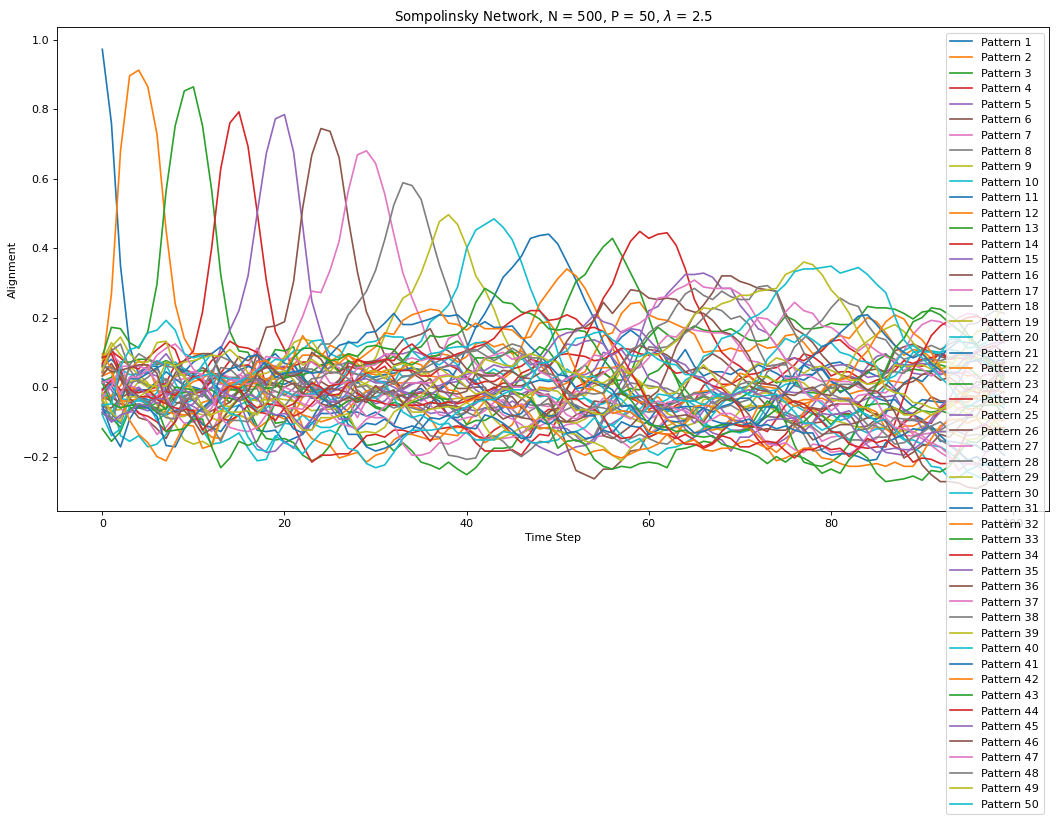

In [208]:
fig = plt.figure(figsize=(16, 8), dpi=80)
for p in range(num_pattern):
    plt.plot(sompolinsky_alignment[p], label = 'Pattern {}'.format(p+1))
plt.xlabel('Time Step')
plt.ylabel('Alignment')
plt.title(f'Sompolinsky Network, N = {num_neuron}, P = {num_pattern}, $\lambda$ = {lambd}')
plt.legend(loc = 'upper right')
plt.savefig(f'Sompolinsky Network N = {num_neuron} P = {num_pattern}.jpg')

In [12]:
# Temporal Sequence Networks
class ModifiedSompolinskyNetwork(object):      
    def initialize(self, patterns, lambd, tau, degree):
        self.patterns = patterns
        self.N = patterns.shape[1]
        self.P =  patterns.shape[0]
        self.Q = self.P - 1
        self.lambd = lambd
        self.tau = tau
        self.d = degree
                                
        
    def predict(self, patterns, num_timestep=1):
        self.num_timestep = num_timestep
        
        # Copy to avoid call by reference 
        self.s_history = np.vstack((generate_patterns(self.N, tau -1), patterns[0]))
        self.alignment_history = np.zeros((self.P, self.num_timestep))
        
        # Define predict list
        predicted_s = []
        predicted_alignment = []
        for t in tqdm(range(self.num_timestep)):            
            self._run(t)
        return np.array(self.s_history), np.array(self.alignment_history)
    
    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        s_avg = np.zeros(s.shape)
        

        for n in range(self.N):
            # Update s
            kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau
            s_avg[n] = np.convolve(kernel, self.s_history[:,n])[len(self.s_history)]

            h_1, h_2 = 0, 0
            for p in range(self.num_pattern):
                # Calculate input for for each pattern and sum over each.
                h_1 += self.patterns[p,n] * (np.dot(self.patterns[p],s) - self.patterns[p,n]*s[n])**(self.d-1)
            for p in range(self.len_sequence):
                h_2 += self.lambd * self.patterns[p+1,n] * (np.dot(self.patterns[p],s_avg) - self.patterns[p,n]*s_avg[n])**(self.d-1)
            s[n] = np.sign(h_1+h_2)

        # Compute Network Alignment and add to history
        self.alignment_history[:,t] = [np.dot(self.patterns[p], s) / self.N for p in range(self.P)]
        self.s_history = np.vstack((self.s_history,s))
        
        return


In [462]:
# Temporal Sequence Networks
class ModifiedSompolinskyNetwork(object):      
    def initialize(self, patterns, lambd, tau, degree):
        self.patterns = patterns
        self.N = patterns.shape[1]
        self.P =  patterns.shape[0]
        self.Q = self.P - 1
        self.lambd = lambd
        self.tau = tau
        self.d = degree
                                
        
    def predict(self, patterns, num_timestep=1):
        self.num_timestep = num_timestep
        
        # Copy to avoid call by reference 
        self.s_history = np.vstack((generate_patterns(self.N, tau -1), patterns[0]))
        self.alignment_history = np.zeros((self.P, self.num_timestep))
        
        # Define predict list
        predicted_s = []
        predicted_alignment = []
        for t in tqdm(range(self.num_timestep)):            
            self._run(t)
        return np.array(self.s_history), np.array(self.alignment_history)
    
#     def average(self, s, t):
#         # Compute s_avg
#         kernel = np.heaviside(self.tau - np.array(list(range(t+self.tau-1))), 0) / self.tau
#         s_avg = [np.convolve(kernel, self.s_history[:,n])[len(self.s_history)] for n in range(self.N)]
#         return s_avg
        
    def update(self, s_avg, s, n):
        h_1 = np.dot(patterns[:,n],((1 / self.N) * (np.dot(self.patterns,s) - self.patterns[:,n]*s[n]))**self.d)            
        h_2 = self.lambd * np.dot(np.roll(self.patterns[:,n],-1), ((1 / self.N) * (np.dot(self.patterns,s_avg) - self.patterns[:,n]*s_avg[n]))**self.d)
        return np.sign(h_1+h_2)

    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        
        # Compute s_avg
        kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau
        s_avg = [np.convolve(kernel, self.s_history[:,n])[len(self.s_history)] for n in tqdm(range(self.N))]
        
        # Update each neuron 
#         x = [[s_avg, s, n] for n in range(self.N)]
#         s = pool_obj.starmap(self.update, x)

#         s_avg = Parallel(n_jobs=6)(delayed(self.average)(s, t))
        s = Parallel(n_jobs=6)(delayed(self.update)(s_avg, s, n) for n in range(self.N))
#         s = [self.update(s_avg,s,n) for n in range(self.N)]
        
        # Compute Network Alignment and add to history
        self.alignment_history[:,t] = [np.dot(self.patterns[p], s) / self.N for p in range(self.P)]
        self.s_history = np.vstack((self.s_history,s))
        
        return
    
    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        
        # Compute s_avg
        kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau
        s_avg = [np.convolve(kernel, self.s_history[:,n])[len(self.s_history)] for n in range(self.N)]
        
        # Update each neuron 
        for n in range(self.N):
            # Update s
            h_1 = np.dot(self.patterns[:,n],((1 / self.N) * (np.dot(self.patterns,s) - self.patterns[:,n]*s[n]))**self.d)            
            h_2 = self.lambd * np.dot(np.roll(self.patterns[:,n],-1), ((1 / self.N) * (np.dot(self.patterns,s_avg) - self.patterns[:,n]*s_avg[n]))**self.d)
            s[n] = np.sign(h_1+h_2)

        # Compute Network Alignment and add to history
        self.alignment_history[:,t] = [np.dot(self.patterns[p], s) / self.N for p in range(self.P)]
        self.s_history = np.vstack((self.s_history,s))
        
        return

In [463]:
# Generate Patterns
num_neuron = 1000
num_pattern = 100
num_timestep = 100
lambd = 2.5
tau = 8
degree = 3
patterns = generate_patterns(num_neuron, num_pattern)

# Create and Train Sompolinsky Network Model
modified_sompolinsky_model = ModifiedSompolinskyNetwork()
modified_sompolinsky_model.initialize(patterns, lambd, tau, degree)

# Evolve the model
modified_sompolinsky_states, modified_sompolinsky_alignment = modified_sompolinsky_model.predict(patterns, num_timestep)

100%|██████████| 100/100 [00:30<00:00,  3.30it/s]


100%|██████████| 100/100 [00:00<00:00, 1703.80it/s]


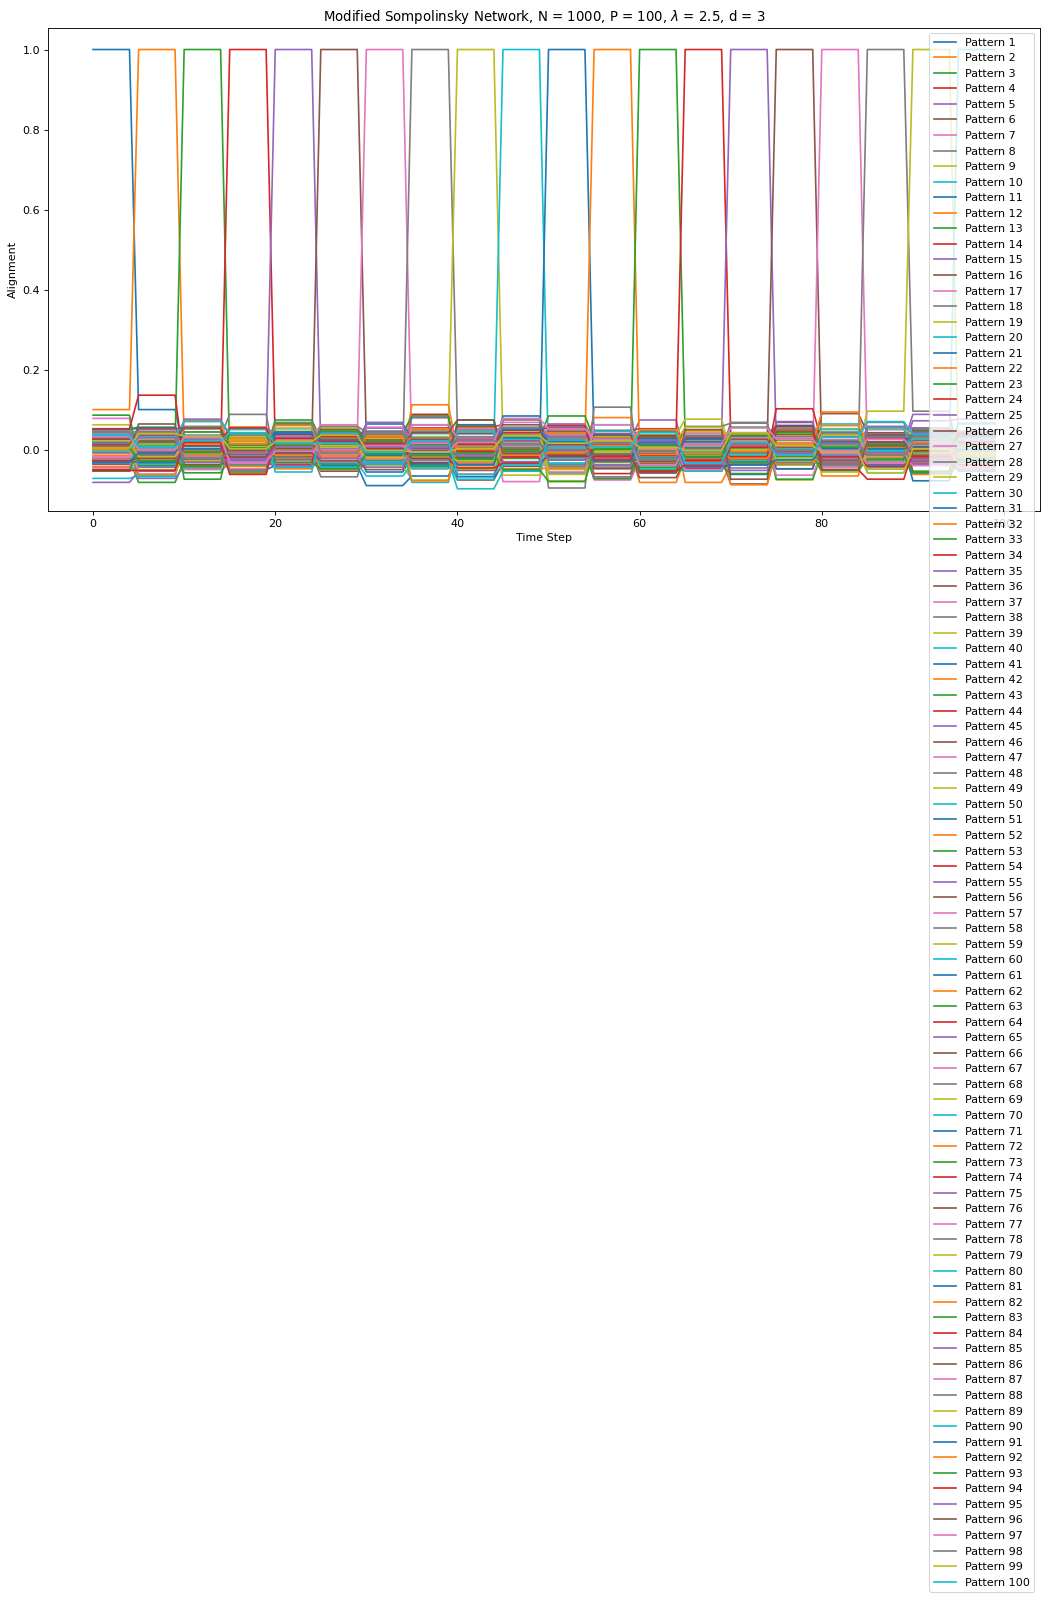

In [465]:
fig = plt.figure(figsize=(16, 8), dpi=80)
for p in tqdm(range(num_pattern)):
    plt.plot(modified_sompolinsky_alignment[p], label = f'Pattern {p+1}')
plt.xlabel('Time Step')
plt.ylabel('Alignment')
plt.title(f'Modified Sompolinsky Network, N = {num_neuron}, P = {num_pattern}, $\lambda$ = {lambd}, d = {degree}')
plt.legend()
plt.savefig(f'Modified Sompolinsky Network N = {num_neuron} P = {num_pattern}.jpg')

In [323]:
# Temporal Sequence Networks
class ModifiedSompolinskyNetwork2(object):      
    def initialize(self, patterns, lambd, tau, degree):
        self.patterns = patterns
        self.num_pattern =  patterns.shape[0]
        self.num_neuron = patterns.shape[1]
        self.len_sequence = self.num_pattern - 1
        self.lambd = lambd
        self.tau = tau
        self.d = degree
                                
        
    def predict(self, patterns, num_timestep=1):
        self.num_timestep = num_timestep
        
        # Copy to avoid call by reference 
        self.s_history = np.vstack((generate_patterns(self.num_neuron, tau -1), patterns[0]))
        self.alignment_history = np.zeros((self.num_pattern, self.num_timestep))
        
        # Define predict list
        predicted_s = []
        predicted_alignment = []
        for t in tqdm(range(self.num_timestep)):            
            self._run(t)
        return np.array(self.s_history), np.array(self.alignment_history)
    
    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        s_avg = np.zeros(s.shape)
        

        for n in range(self.num_neuron):
            # Update s
            kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau
            s_avg[n] = np.convolve(kernel, self.s_history[:,n])[len(self.s_history)]

            h_1, h_2 = 0, 0
            for p in range(self.num_pattern):
                # Calculate input for for each pattern and sum over each.
                h_1 += self.patterns[p,n] * (np.dot(self.patterns[p],s) - self.patterns[p,n]*s[n])**(self.d - 1)
            for p in range(self.len_sequence):
                h_2 += self.lambd * self.patterns[p+1,n] * (np.dot(self.patterns[p],s_avg) - self.patterns[p,n]*s_avg[n])
            s[n] = np.sign(h_1+h_2)

        for p in range(self.num_pattern):
            for n in range(self.num_neuron):
                self.alignment_history[p,t] += self.patterns[p,n] * s[n] / self.num_neuron
        
        self.s_history = np.vstack((self.s_history,s))
        
        return

In [17]:
# Generate Patterns
num_neuron = 100
num_pattern = 50
num_timestep = 300
lambd = 2.5
tau = 8
degree = 3
patterns = generate_patterns(num_neuron, num_pattern)

# Create and Train Sompolinsky Network Model
modified_sompolinsky_model2 = ModifiedSompolinskyNetwork2()
modified_sompolinsky_model2.initialize(patterns, lambd, tau, degree)

# Evolve the model
modified_sompolinsky_states2, modified_sompolinsky_alignment2 = modified_sompolinsky_model2.predict(patterns, num_timestep)

100%|██████████| 300/300 [00:12<00:00, 23.19it/s]


In [52]:
# Temporal Sequence Networks
class ModifiedSompolinskyNetwork2(object):      
    def initialize(self, patterns, lambd, tau, degree):
        self.patterns = patterns
        self.num_pattern =  patterns.shape[0]
        self.num_neuron = patterns.shape[1]
        self.len_sequence = self.num_pattern - 1
        self.lambd = lambd
        self.tau = tau
        self.d = degree
                                
        
    def predict(self, patterns, num_timestep=1):
        self.num_timestep = num_timestep
        
        # Copy to avoid call by reference 
        self.s_history = np.vstack((generate_patterns(self.num_neuron, tau -1), patterns[0]))
        self.alignment_history = np.zeros((self.num_pattern, self.num_timestep))
        
        # Define predict list
        predicted_s = []
        predicted_alignment = []
        for t in tqdm(range(self.num_timestep)):            
            self._run(t)
        return np.array(self.s_history), np.array(self.alignment_history)
    
    def _run(self, timestep):
        """
        Asynchronous update
        """
        # Initialize in a pattern
        t = timestep
        s = self.s_history[-1]
        s_avg = np.zeros(s.shape)
        

        for n in range(self.num_neuron):
            # Update s
            kernel = np.heaviside(self.tau - np.array(list(range(t+tau-1))), 0) / self.tau
            s_avg[n] = np.convolve(kernel, self.s_history[:,n])[len(self.s_history)]

            h_1, h_2 = 0, 0
            for p in range(self.num_pattern):
                # Calculate input for for each pattern and sum over each.
                h_1 += self.patterns[p,n] * ((1 / self.num_neuron) * np.dot(self.patterns[p],s))**(self.d - 1)
            for p in range(self.len_sequence):
                h_2 += self.lambd * self.patterns[p+1,n] * ((1 / self.num_neuron) * np.dot(self.patterns[p],s_avg))
            s[n] = np.sign(h_1+h_2)

        for p in range(self.num_pattern):
            for n in range(self.num_neuron):
                self.alignment_history[p,t] += self.patterns[p,n] * s[n] / self.num_neuron
        
        self.s_history = np.vstack((self.s_history,s))
        
        return

In [65]:
# Generate Patterns
num_neuron = 10000
num_pattern = 500
num_timestep = 100
lambd = 2.5
tau = 8
degree = 3
patterns = generate_patterns(num_neuron, num_pattern)

# Create and Train Sompolinsky Network Model
modified_sompolinsky_model2 = ModifiedSompolinskyNetwork2()
modified_sompolinsky_model2.initialize(patterns, lambd, tau, degree)

# Evolve the model
modified_sompolinsky_states2, modified_sompolinsky_alignment2 = modified_sompolinsky_model2.predict(patterns, num_timestep)

  1%|          | 1/100 [04:44<7:48:42, 284.06s/it]


KeyboardInterrupt: 

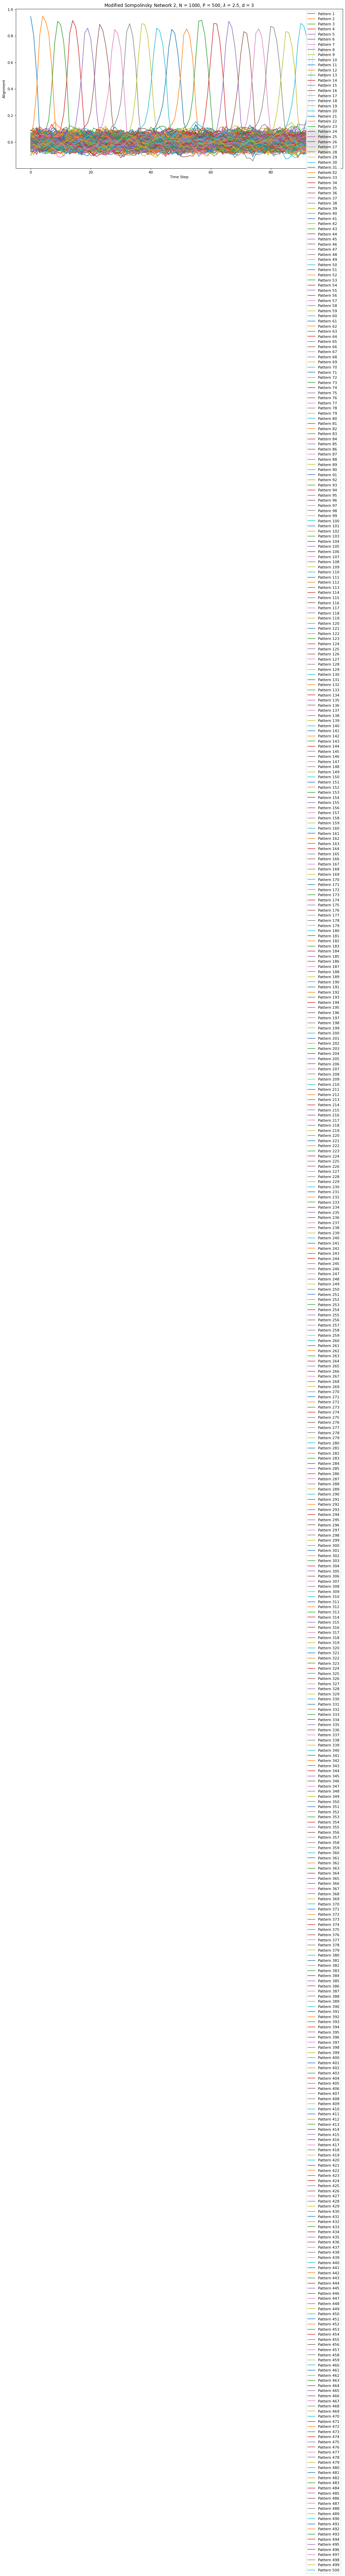

In [64]:
fig = plt.figure(figsize=(16, 8), dpi=80)
for p in range(num_pattern):
    plt.plot(modified_sompolinsky_alignment2[p], label = f'Pattern {p+1}')
plt.xlabel('Time Step')
plt.ylabel('Alignment')
plt.title(f'Modified Sompolinsky Network 2, N = {num_neuron}, P = {num_pattern}, $\lambda$ = {lambd}, d = {degree}')
plt.legend()
plt.savefig(f'Modified Sompolinsky Network 2 N = {num_neuron} P = {num_pattern}.jpg')

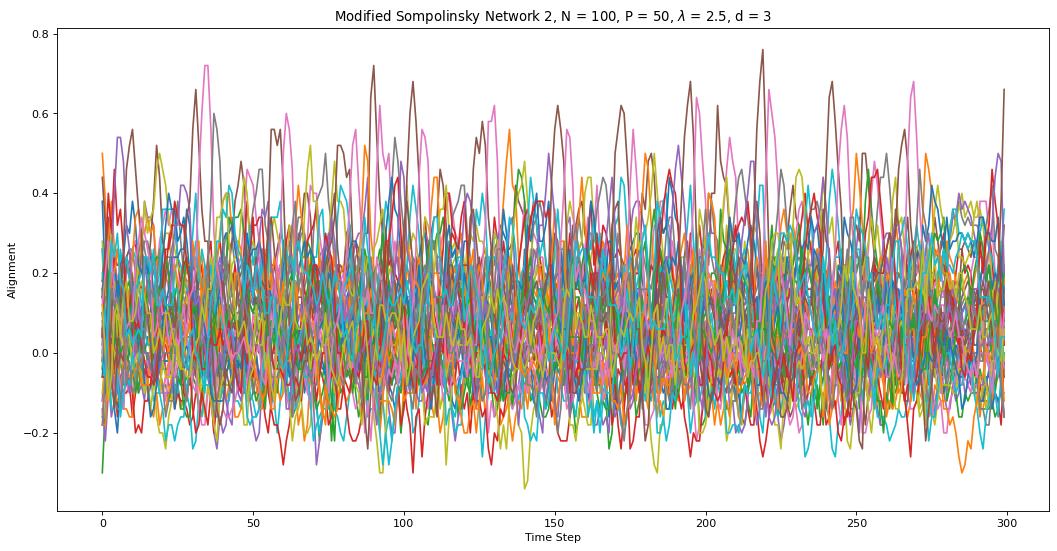

In [21]:
fig = plt.figure(figsize=(16, 8), dpi=80)
for p in range(num_pattern):
    plt.plot(modified_sompolinsky_alignment2[p], label = f'Pattern {p+1}')
plt.xlabel('Time Step')
plt.ylabel('Alignment')
plt.title(f'Modified Sompolinsky Network 2, N = {num_neuron}, P = {num_pattern}, $\lambda$ = {lambd}, d = {degree}')
# plt.legend()
plt.savefig(f'Modified Sompolinsky Network 2 N = {num_neuron} P = {num_pattern}.jpg')